In [9]:
"For the data"
"-------------------"
import pandas as pd
df=pd.read_csv('female_literacy_fertility.csv')
illiteracy=100-df['female literacy'].values
fertility=df['fertility'].values
"--------------------"

'--------------------'

In [10]:
from draw_bs_pairs_linreg import draw_bs_pairs_linreg

In [11]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

- Now I am going to construct 95% confidence interval for the slopes that were obtained due to bootstraping


In [12]:
#Compute and print 95% CI for slope
import numpy as np
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

[0.04398097 0.05538483]


- Histogram is a s below

C:\Users\mytufail\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


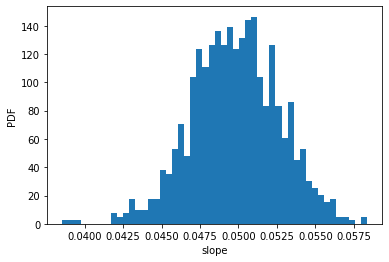

In [13]:
import matplotlib.pyplot as plt
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

- Now I am going to Plot bootstrap regressions as below:

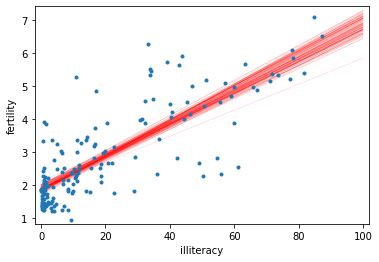

In [14]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()



- Perfect regression lines with the bootstrap parameters are obtained. 